# Informações gerais
- Descrição
- Tamanho
- Pré visualização
- Informações
- Quantidade de valores nulos

In [1]:
import pandas as pd

# Carregar a base
df_geocode = pd.read_csv('../data/df_geocode.csv')
 
# Exclusão da coluna Unnamed
df_geocode.drop(columns=['Unnamed: 0'], inplace=True)

# Visualizar a descrição
display(df_geocode.describe())

# Conferir tamanho (linhas x colunas)
print("\nTamanho:", df_geocode.shape, "\n")

# Mostrar algumas tuplas para melhor entendimento
display(df_geocode)

# Detalhar o tipo de cada atributo
print(df_geocode.info())

# Definir a quantidade de valores nulos por atributo
print("\nNulos:\n")
print(df_geocode.isnull().sum())

,Zipcode
count,118.000000
mean,47422.305085
std,37504.806583
min,1605.000000
25%,13440.250000
50%,30244.000000
75%,94545.250000
max,98383.000000



Tamanho: (119, 4) 



,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0
...,...,...,...,...
114,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002.0
115,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421.0
116,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304.0
117,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lab Id    119 non-null    object 
 1   Address   119 non-null    object 
 2   Location  119 non-null    object 
 3   Zipcode   118 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.8+ KB
None

Nulos:

Lab Id      0
Address     0
Location    0
Zipcode     1
dtype: int64


# Tratamento dos valores nulos
- Localizar a única linha, como ela não tem mais nenhum dado, remover e ajustar os índices

In [2]:
# Verifica quais linhas têm valor nulo na coluna Zipcode
linha_zip_nulo = df_geocode[df_geocode['Zipcode'].isnull()]

linha_zip_nulo

,Lab Id,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


In [3]:
# Remove a linha com Zipcode nulo
df_geocode = df_geocode[df_geocode['Zipcode'].notnull()]

df_geocode.reset_index(drop=True, inplace=True)

# Conferir mudanças
df_geocode.iloc[80:86]

,Lab Id,Address,Location,Zipcode
80,L695,"95 GENESEE ST, NEW HARTFORD, NY 13413","43.0731473,-75.2957098",13413.0
81,L139,"8100 TIMBERLAKE WAY STE E, SACRAMENTO, CA 95823","38.4634804,-121.416546",95823.0
82,L666,"173 S MAIN STREET, ALPHARETTA, GA 30009","34.0708467,-84.3000492",30009.0
83,L170,"25 PELHAM RD STE 103A, SALEM, NH 03079","42.775748,-71.2495637",3079.0
84,L123,"543 SOUTH 52ND STREET, PHILADELPHIA, PA 19143","39.9507025,-75.2286725",19143.0
85,L145,"21616 76TH AVE W SUITE 207, EDMONDS, WA 98026","47.8026806,-122.3389483",98026.0


# Análise Exoloratória
- Analisar os estados com mais laboratórios.

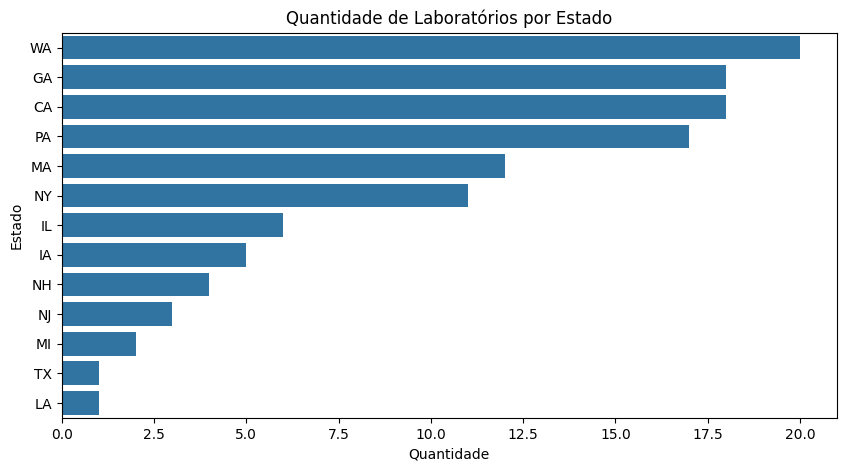

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extrair o estado de dentro da coluna "Address"
# A expressão regular procura pelas 2 letras maiúsculas (o estado)
df_geocode['State'] = df_geocode['Address'].str.extract(r', ([A-Z]{2}) \d{5}')

# Tamanho do gŕafico 
plt.figure(figsize=(10, 5))

# Gera um gráfico contando quantos laboratórios existem por estado colocando os com mais no topo
sns.countplot(y='State', data=df_geocode, order=df_geocode['State'].value_counts().index)
plt.title('Quantidade de Laboratórios por Estado')
plt.xlabel('Quantidade')
plt.ylabel('Estado')
plt.show()

- ZIP Code (Zoning Improvement Plan) é o código postal dos EUA — parecido com o CEP no Brasil, identifica uma região geográfica
- Analisar as regiões com mais laboratórios

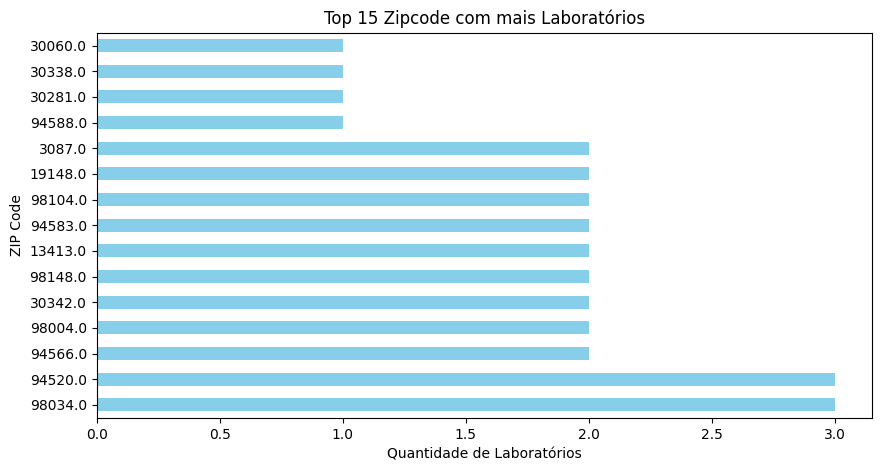

In [5]:
# Contagem de quantas vezes aparece o zip code
zip_counts = df_geocode['Zipcode'].value_counts().head(15)
zip_counts.plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.title('Top 15 Zipcode com mais Laboratórios')
plt.xlabel('Quantidade de Laboratórios')
plt.ylabel('ZIP Code')
plt.show()

- Tabela para melhor vizualizar quantos laboratórios tem em cada ZIP Code e de qual estado ele pertence

In [6]:
# Contar os top 11 ZIP Codes com mais laboratórios
top_zipcodes = df_geocode['Zipcode'].value_counts().head(11).index.tolist()

# Filtrar os dados apenas para esses top 11
df_top_zip = df_geocode[df_geocode['Zipcode'].isin(top_zipcodes)]

# Criar uma tabela com contagem e estado
tabel_top_zip = (
    df_top_zip.groupby(['Zipcode', 'State'])
    .agg(Labs=('Lab Id', 'count'))
    .reset_index()
    .sort_values(by='Labs', ascending=False)
)

display(tabel_top_zip)


,Zipcode,State,Labs
4,94520.0,CA,3
8,98034.0,WA,3
0,3087.0,NH,2
2,19148.0,PA,2
1,13413.0,NY,2
5,94566.0,CA,2
3,30342.0,GA,2
6,94583.0,CA,2
7,98004.0,WA,2
9,98104.0,WA,2


# Hipóteses levantadas após análise indvidual da base geocode
- Possibilidade de expansão em regiões, as quais os laboratórios possuem maior lucratividade, independente de quantos laboratórios já existem.

# Salvar a base tratada

In [32]:
df_geocode.to_csv('../data/g_treated.csv', index=False)
